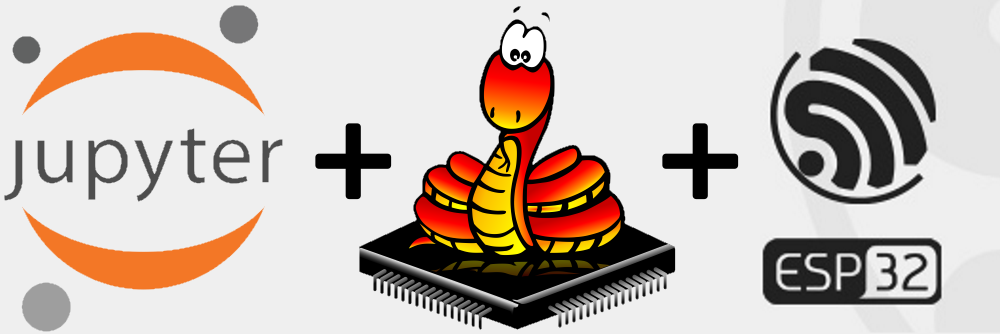

***
# MicroPython fun on €10 hardware


[MicroPython](https://github.com/micropython/micropython) is an implementation of the Python 3 optimised to run on microcontrollers.
- MicroPython is a full Python compiler and runtime that runs on the microcontroller hardware. 
- Can interact with the the REPL running on the hardware. 
- Includes a subset of core Python libraries and hardware specific libraries that vary for each hardware port.


Some interesting opportunities for Python developers:
1. Opportunity to try embedded development.
2. Embedded developers who use C/C++ have the opportunity to take advantage of Python’s ease of use and rich libraries.
3. Beginner programmers have the opportunity to create projects using light, sound, sensors, and networking.



***
# Jupyter Notebook MicroPython kernel install

Going to be using a Jupyter kernel to interact with a MicroPython board over its REPL interface. [PyPi Jupyter MicroPython Remote page](https://pypi.org/project/jupyter-micropython-remote/)



From the shell command to install the MicroPython kernel for Jupyter run:

```
pip install jupyter_micropython_remote
```

Next register the kernel with Jupyter:

```
python -m mpy_kernel.install
```
    
And that should be it!!! Run Jupyter notebooks:

```
jupyter notebook 
```

You should now have a 'MicroPython Remote' option when creating a new Jupyter notebook.



***
# What does €10 get you?


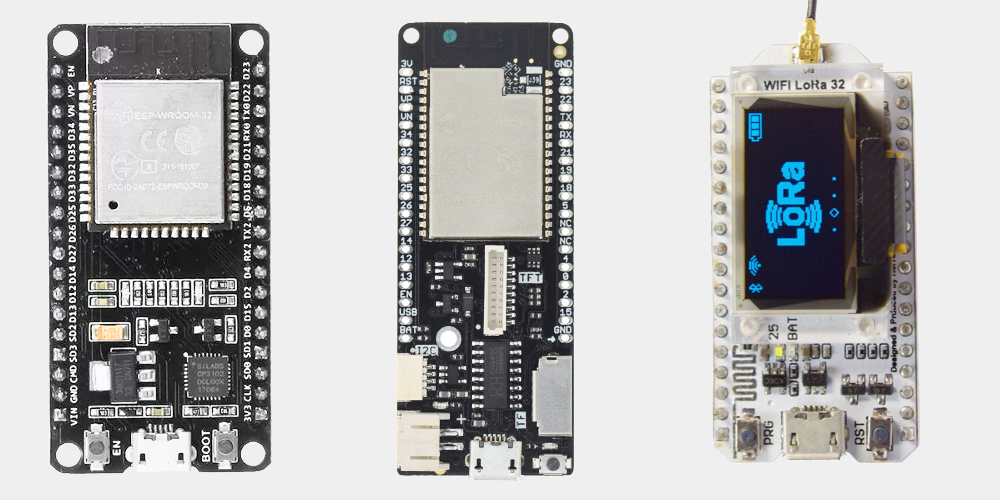



Quite a lot actually:
- €5  ESP32 with 4MB flash, Wi-Fi & Bluetooth, lots of I/O.
- €10 ESP32 with 16MB flash, 8MB PSRAM, Wi-Fi & Bluetooth, lots of I/O, lithium battery charging circuit, SD card slot.
- €15 ESP32 with 4MB flash, Wi-Fi & Bluetooth, lots of I/O, lithium battery charging circuit, OLED display, LoRa wireless with km range.

ESP32 developer boards typically consist of:
- ESP32 System On Chip (SOC) as seen at top of each of these boards.
- USB interface for power and primary communication during development as seen at the bottom of these boards.
- Exposes GPIO and power on two rows of pins either side of the board.
- Ultra low power co-processor with access to GPIO for deep sleep.
- Built in security and encrytin hardware.


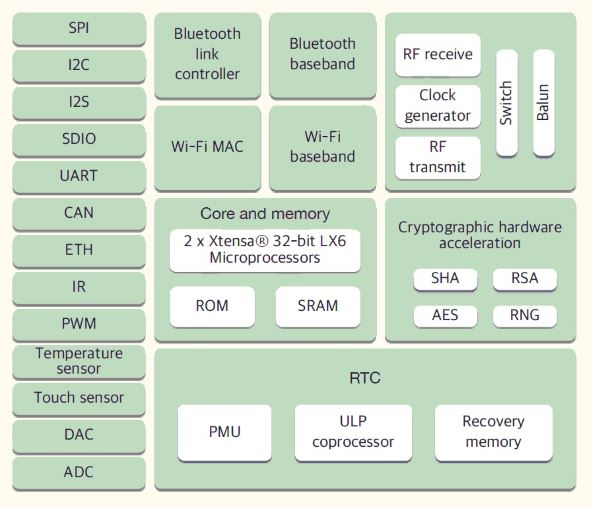



The ESP32 SOC:
- Dual core, clock frequency up to 240MHz, 512 KB internal RAM.
- Modules come in different variants with additional external flash and PSRAM.
- Wi-Fi and bluetooth built-in.
- Runs 32 bit programs.
- Up to 40 GPIO pins.


Check available documentation before buying. 
- Are board schematics available (usually based on an Espressif reference design)? 
- Are common parts used for display, LoRa chips, etc? There is better library support for common components.


***
# Establish a notebook connection to your microcontroller 


In the first cell of your Jupyter Notebook should contain something like this:

```
%connect <device> --baudrate=115200 --user='micro' --password='python' --wait=0
```

You may need to reset the microcontroller with a soft reboot:

```
%reboot
```

**Note: Remember that you should only have one connection open on the serial port connected to the hardware.**



In [1]:
%connect COM4 --baudrate=115200

Connected on COM4


In [1]:
# Lets look at some of the microcontroller sys details

import sys

print("Platform: {}".format(sys.platform))
print("MircoPython Version: {}".format(sys.implementation))


Platform: esp32
MircoPython Version: (name='micropython', version=(1, 11, 0))


In [ ]:
# List of magic functions.

%lsmagic


***
# MicroPython modules

Lets see what MicroPython libraries are available on the ESP32 board:

- [MicroPython standard libraries and micro-libraries](https://docs.micropython.org/en/latest/library/index.html#python-standard-libraries-and-micro-libraries)




In [1]:
# To get a list modules available for the ESP32 port.

help('modules')

__main__          framebuf          socket            upip
_boot             gc                ssl               upip_utarfile
_onewire          hashlib           struct            upysh
_thread           heapq             sys               urandom
_webrepl          inisetup          time              ure
apa106            io                ubinascii         urequests
array             json              ucollections      uselect
binascii          machine           ucryptolib        usocket
btree             math              uctypes           ussl
builtins          micropython       uerrno            ustruct
cmath             neopixel          uhashlib          utime
collections       network           uhashlib          utimeq
dht               ntptime           uheapq            uwebsocket
ds18x20           onewire           uio               uzlib
errno             os                ujson             webrepl
esp               random            umqtt/robust      webrepl_setup
esp32   

In [1]:
# The machine module contains functions related to the hardware on the board. 
# Including: I2C, SPI, UART interface, etc

import machine
help(machine)

object <module 'umachine'> is of type module
  __name__ -- umachine
  mem8 -- <8-bit memory>
  mem16 -- <16-bit memory>
  mem32 -- <32-bit memory>
  freq -- <function>
  reset -- <function>
  unique_id -- <function>
  sleep -- <function>
  lightsleep -- <function>
  deepsleep -- <function>
  idle -- <function>
  disable_irq -- <function>
  enable_irq -- <function>
  time_pulse_us -- <function>
  Timer -- <class 'Timer'>
  WDT -- <class 'WDT'>
  SDCard -- <class 'SDCard'>
  SLEEP -- 2
  DEEPSLEEP -- 4
  Pin -- <class 'Pin'>
  Signal -- <class 'Signal'>
  TouchPad -- <class 'TouchPad'>
  ADC -- <class 'ADC'>
  DAC -- <class 'DAC'>
  I2C -- <class 'I2C'>
  PWM -- <class 'PWM'>
  RTC -- <class 'RTC'>
  SPI -- <class 'SoftSPI'>
  UART -- <class 'UART'>
  reset_cause -- <function>
  HARD_RESET -- 2
  PWRON_RESET -- 1
  WDT_RESET -- 3
  DEEPSLEEP_RESET -- 4
  SOFT_RESET -- 5
  wake_reason -- <function>
  PIN_WAKE -- 2
  EXT0_WAKE -- 2
  EXT1_WAKE -- 3
  TIMER_WAKE -- 4
  TOUCHPAD_WAKE -- 5
  

***
# Controlling machine hardware

Lets work through some examples of controlling hardware with MicroPython:
1. [I/O Pins](https://randomnerdtutorials.com/esp32-pinout-reference-gpios/).
2. Pulse Width Modulation (PWM).
3. Timers.
4. Interrupts.
5. Wifi.
6. upip package manager (if time permits).
7. Deepsleep (if time permits).
8. Jupyter %local cell interaction with remote hardware.
9. Upload program to hardware.



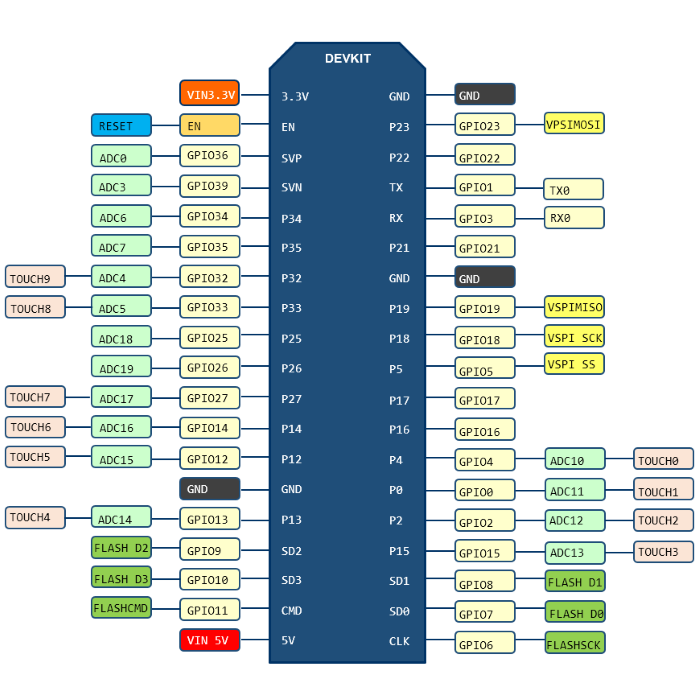


Peripheral Input/Output include:
- 2 × I²C (Inter-Integrated Circuit).
- 3 x UART (universal asynchronous receiver/transmitter).
- CAN 2.0 (Controller Area Network).
- 4 × SPI (Serial Peripheral Interface).
- 2 × I²S (Integrated Inter-IC Sound).
- PWM (pulse width modulation) up to 16 channels. Useful for LED or motor control.
- 10 x Capacitive touch sensors.
- 12-bit ADCs (analog-to-digital converter) up to 18 channels.
- 2 × 8 bit DACs (digital-to-analog converter).
- Hall sensor.
- Internal temperature sensor.



***
# Blink the 'Hello World' for microcontroller

***

In [ ]:
# [Hardware I/O pins class](https://docs.micropython.org/en/latest/library/machine.Pin.html)

from machine import Pin
import time

# Geekworm board has two onboard LEDs and a user button:
# LEDs: Pin 0, Pin 27
# Button: Pin 0

p27 = Pin(27, Pin.OUT)
p27.off()
    
for _ in range(10):
    p27.value(not p27.value())
    time.sleep_ms(1000)
    print('Blink LED ....')
    


***
## Pulse Width Modulation (PWM)

Typically used to control the brightness of a LED or to control motor speed.

To use PWM first create a Pin object and then specify the pulse frequency and duty cycle.
- ESP32 can generate PWM on all I/O pins.
- Frequency is between 1Hz and 5kHz (?).
- Duty cycle is between 0 (all off) and 1023 (all on), with 512 being 50% duty.



In [1]:
# Demo: Controller LED with PWM.

from machine import Pin, PWM

led_pwm = PWM(Pin(27), freq=1, duty=512)

print('Frequency: {} Hz'.format(led_pwm.freq()))
print('Duty Cycle: {:.1%}'.format(led_pwm.duty()/1024))

Frequency: 1 Hz
Duty Cycle: 50.0%


In [1]:
# Deactivate PWM

led_pwm.deinit()

***
## Hardware Timer

[Control hardware timers class](https://docs.micropython.org/en/latest/library/machine.Timer.html)

To use a timer select a hardware timer, the trigger mode, and specify a callback function.
- The ESP32 has 4 hardware timers. Can also specify a software timer by using id = -1
- Timer period in ms.
- Timer mode:
 - Timer.ONE_SHOT - The timer runs once until the configured period of the channel expires.
 - Timer.PERIODIC - The timer runs periodically at the configured frequency of the channel.
- Callback function is called when triggered.



In [1]:
# Control a LED with a Timer.

from machine import Pin, Timer

p27 = Pin(27, Pin.OUT)

def flash_led(timer):
    p27.value(not p27.value())
    
# Use hardware timer 0
flash_timer = Timer(0)
flash_timer.init(period=1000, mode=Timer.PERIODIC, callback=flash_led)


In [1]:
# Disable timer.

flash_timer.deinit()

***
## Hardware Interrupt

[Hardware pin class interrupts](https://docs.micropython.org/en/latest/library/machine.Pin.html)


- ESP32 interrupt pins: you can use all GPIOs as interrupts, except GPIO 6 to GPIO 11 (used for external flash memory interface).
- Set a callback function to be executed on the trigger. Callback functions should be as short and simple as possible.
- Interrupts can be triggers on rising/falling edge or pin level.
- Option to specify the power mode in which to *wake* up the system from sleep. It can be:
 - machine.IDLE
 - machine.SLEEP
 - machine.DEEPSLEEP





In [ ]:
# Trigger a hardware interrupt from a button press and toggle a LED.

from machine import Pin

# Geekworm board has two onboard LEDs and a user button:
# LEDs: Pin 0, Pin 27
# Button: Pin 0

p27 = Pin(27, Pin.OUT)
button0 = Pin(0, Pin.IN)

def button_isr(pin):
    p27.value(not p27.value())

button0.irq(trigger=Pin.IRQ_FALLING, handler=button_isr)


In [ ]:
# Disable IRQ

button0.irq(trigger=0)

***
# Wireless connectivity

ESP32 offers a cheap solution for IoT projects with Bluetooth and WiFi. Wireless version that are supported:
- Wi-Fi: 802.11 b/g/n.
- Bluetooth: v4.2 and BLE.


Can set up an ESP32 as a WiFi Station (**network.STA_IF**) or Access Point (**network.AP_IF**).


In [ ]:
# Scan for available WiFi networks.

import network

wlan = network.WLAN(network.STA_IF)
wlan.active(True)

nets = wlan.scan()
for n in nets:
    # WiFi: (ssid, bssid, channel, RSSI, authmode, hidden). 
    print("ssid: {}, bssid: {}, channel: {}, RSSI: {}, authmode: {}, hidden: {}".format(n[0],n[1],n[2],n[3],n[4],n[5]))

wlan.disconnect()

***
## Accessing PC filesystem from the microcontroller

The local PC's working Jupyter directory is mounted at directory **/remote/** on the actual micropython environment. This allows you to view, open, read, write and copy files to and from the microcontroller to your PC.


In [ ]:
import os,json

help(os)
print(' ')
help(json)

In [ ]:
# Load WiFi credentials from config file stored in the PC Jupyter working directory.

import json, os


print(os.listdir('/'))

try:
    with open('/remote/assets/config.json', 'r') as f:
        data = json.load(f)
        ssid = data['ssid']
        wifi_pwd = data['wifi_pwd']
        
except FileNotFoundError:
    ssid = "your_ssid"
    wifi_pwd = "your_pwd"
    
    
print('SSID: {}'.format(ssid))
print('WiFi pwd: {}'.format(wifi_pwd))


In [ ]:
# Connect ESP32 to local WiFi network.

import network

# Get WiFi credentials in cell above

wlan = network.WLAN(network.STA_IF)

if not wlan.isconnected():
    print('connecting to network...')
    wlan.active(True)
    wlan.connect(ssid, wifi_pwd)
    while not wlan.isconnected():
        pass

print('Network config:', wlan.ifconfig())

#wlan.disconnect()

***
# Installing packages using the upip package manager


- [MicroPython extra packages](https://pypi.org/search/?q=micropython)
 - [HX711 for load cell wheatstone bridge](https://pypi.org/project/micropython-hx711/)
 
**Remember limited memory available on the device**
<br />

In [ ]:
# Install package with upip

import upip

#upip.install('micropython-hx711')
upip.install('notes-pico')


In [ ]:
help('modules')

In [ ]:
import upip

help(upip)

***
# ESP32 deep sleep

[ESP32 sleep modes & power consumption](https://lastminuteengineers.com/esp32-sleep-modes-power-consumption/)

[ESP32 deep sleep tutorial](https://randomnerdtutorials.com/micropython-esp32-deep-sleep-wake-up-sources/)


Microcontroller can enter a sleep state which stops execution in an attempt to enter a low power state.
- **machine.lightsleep**: A lightsleep has full RAM and state retention. Upon wake execution is resumed from the point where the sleep was requested, with all subsystems operational.
- **machine.deepsleep**: A deepsleep may not retain RAM or any other state of the system (date can be stored in the RTC module memory). Upon wake execution is resumed from the main script, similar to a hard or power-on reset.

ESP32 can wake up after sleeping for a specified time. If no time interval is specified sleep can last indefinitely or until a **wake** interrupt is received one of the following sources:
- Timer
- External wake up when a change in the state of a pin occurs.
- Touch pins


In [ ]:
import machine
import esp32
from machine import Pin
from time import sleep

wake1 = Pin(0, mode = Pin.IN)
wake2 = Pin(34, mode = Pin.IN)

esp32.wake_on_ext1(pins = (wake1, wake2), level = esp32.WAKEUP_ALL_LOW)

for i in reversed(range(5)):
    print('Im awake. Going to sleep in {} seconds...'.format(i+1))
    sleep(1)

print('Going to sleep now')


# DEMO 1:
# Deep sleep until external wake up pin pressed
machine.deepsleep()


# DEMO 2:
# Light sleep for 5 seconds then wake and continue execution
#machine.lightsleep(5000)
#cycle(2)



In [ ]:
# Try to reconnect after waking from deepsleep

%connect COM4 --baudrate=115200

***
# NeoPixel

[Neopixel](https://docs.micropython.org/en/latest/esp8266/tutorial/neopixel.html), also known as WS2812 LEDs, are individually addressable RGB LED strips 

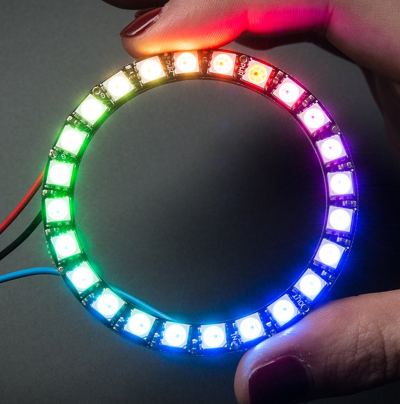


In [ ]:
# Configure a NeoPixel strip of 8 LEDs controlled by pin 34

from machine import Pin
import neopixel, time

n = 24    # Neopixel led count
led_pin = 27
    
np = neopixel.NeoPixel(Pin(led_pin, Pin.OUT), n)


def cycle(count):
    for i in range(count * n):
        for j in range(n):
            np[j] = (0, 0, 0)
        np[i % n] = (0, 255, 0)
        np.write()
        time.sleep_ms(250)


# Cycle NeoPixels for 2 loops
cycle(2)


***
# %local cell execution


Individual cells can also be run on the local PC instead of the remote kernel by starting a cell with **%local**

In %local cells, a special global function **remote()** is available which will pass a single string argument to the micropython board to be run.

This can be useful to work directly with local files, use [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html), etc. 




In [ ]:
# MicroPython cell executed on remote hardware

from machine import Pin
import neopixel

n = 24    # Neopixel led count
led_pin = 27
    
np = neopixel.NeoPixel(Pin(led_pin, Pin.OUT), n)

def set_colour(r, g, b):
    for i in range(n):
        np[i] = (r, g, b)
    np.write()

# Set default LED level
# set_colour(0x7f, 0x7f, 0x7f)

In [ ]:
# Run a colour picker locally

%local

from ipywidgets import interact, ColorPicker

def set_led(led_colour):
    r = int(led_colour[1:3], 16)
    g = int(led_colour[3:5], 16)
    b = int(led_colour[5:7], 16)

    remote(f"set_colour({r}, {g}, {b})")

    print("R:{} G:{} B:{}".format(r, g, b))


pick_colour = ColorPicker(description='LED Colour', value='#000000')
interact(set_led, led_colour=pick_colour)



***
# Uploading your Python script to the board

[Adafruit ampy tool](https://learn.adafruit.com/micropython-basics-load-files-and-run-code/install-ampy)


The MicroPython board filesystem root contains two important files:
1. **/boot.py** is run when the board is powered on or reset. Generally it is not edited and should only be used to setup board configuration.
2. **/main.py** is an optional file and is run after boot.py. This file can be used to start your application script after power on. 

```
ampy -p COM4 put blink.py /main.py
```



In [2]:
# The os module contains functions for filesystem access.

import os

help(os)

object <module 'uos'> is of type module
  __name__ -- uos
  uname -- <function>
  urandom -- <function>
  dupterm -- <function>
  dupterm_notify -- <function>
  ilistdir -- <function>
  listdir -- <function>
  mkdir -- <function>
  rmdir -- <function>
  chdir -- <function>
  getcwd -- <function>
  remove -- <function>
  rename -- <function>
  stat -- <function>
  statvfs -- <function>
  mount -- <function>
  umount -- <function>
  VfsFat -- <class 'VfsFat'>


In [2]:
import os

print(os.listdir('/'))



['remote', 'boot.py', 'lib']


***
# Questions

- Do you use MicroPython in production or implement in C/C++ once development is complete?
- 
